In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shap


In [86]:
df_undersample = pd.read_csv('df_train_undersample.csv')
df_undersample

df_oversample = pd.read_csv('df_train_oversample.csv')
df_oversample

,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel,Vintage,Annual_Premium_Bucketed,Response
0,44,28,0,2,1,26,217,4,1
1,76,3,0,0,0,26,183,3,0
2,47,28,0,2,1,26,27,3,1
3,21,11,1,1,0,152,203,0,0
4,29,41,1,1,0,152,39,0,0
...,...,...,...,...,...,...,...,...,...
661423,35,50,0,0,1,157,296,2,1
661424,54,28,0,0,1,124,218,3,1
661425,25,36,0,1,1,152,257,0,1
661426,67,8,0,0,1,26,68,4,1


In [87]:
df = pd.read_csv('240304 Training Assignment Dataset - Copy.csv')

In [88]:
df = pd.read_csv('df_train_oversample.csv')

In [89]:
df = df.dropna()

In [90]:
df.isna().sum()

Age                        0
Region_Code                0
Previously_Insured         0
Vehicle_Age                0
Vehicle_Damage             0
Policy_Sales_Channel       0
Vintage                    0
Annual_Premium_Bucketed    0
Response                   0
dtype: int64

In [91]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

In [92]:
df = df.drop(columns=['Vintage'])
# df = df.drop(columns=['Region_Code'])

In [93]:
df

,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel,Annual_Premium_Bucketed,Response
0,44,28,0,2,1,26,4,1
1,76,3,0,0,0,26,3,0
2,47,28,0,2,1,26,3,1
3,21,11,1,1,0,152,0,0
4,29,41,1,1,0,152,0,0
...,...,...,...,...,...,...,...,...
661423,35,50,0,0,1,157,2,1
661424,54,28,0,0,1,124,3,1
661425,25,36,0,1,1,152,0,1
661426,67,8,0,0,1,26,4,1


In [94]:
df.dtypes

Age                        int64
Region_Code                int64
Previously_Insured         int64
Vehicle_Age                int64
Vehicle_Damage             int64
Policy_Sales_Channel       int64
Annual_Premium_Bucketed    int64
Response                   int64
dtype: object

In [95]:
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

X = df.drop('Response', axis=1)
y = df['Response']

# scaler = StandardScaler()
# X['Annual_Premium']= scaler.fit_transform(X[['Annual_Premium']])
# X['Age'] = scaler.fit_transform(X[['Age']])
# X['Policy_Sales_Channel'] = scaler.fit_transform(X[['Policy_Sales_Channel']])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# undersampler = RandomUnderSampler(random_state=42)
# X_train, y_train= undersampler.fit_resample(X_train, y_train)

# smote = SMOTE(random_state=42)
# X_train, y_train = smote.fit_resample(X_train, y_train)




In [96]:
df.columns

Index(['Age', 'Region_Code', 'Previously_Insured', 'Vehicle_Age',
       'Vehicle_Damage', 'Policy_Sales_Channel', 'Annual_Premium_Bucketed',
       'Response'],
      dtype='object')

In [97]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [98]:
rf = RandomForestClassifier(max_depth=7,n_estimators=150)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

print(classification_report(y_test, y_pred))

feature_importances = rf.feature_importances_

print(feature_importances)

Accuracy: 0.80003174939147
Precision: 0.7392276618255266
Recall: 0.9281045751633987
              precision    recall  f1-score   support

           0       0.90      0.67      0.77     66037
           1       0.74      0.93      0.82     66249

    accuracy                           0.80    132286
   macro avg       0.82      0.80      0.80    132286
weighted avg       0.82      0.80      0.80    132286

[0.1121822  0.01119567 0.38536744 0.06915121 0.35466445 0.04867861
 0.01876041]


['Age', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Policy_Sales_Channel', 'Annual_Premium_Bucketed']
[0.1121822  0.01119567 0.38536744 0.06915121 0.35466445 0.04867861
 0.01876041]


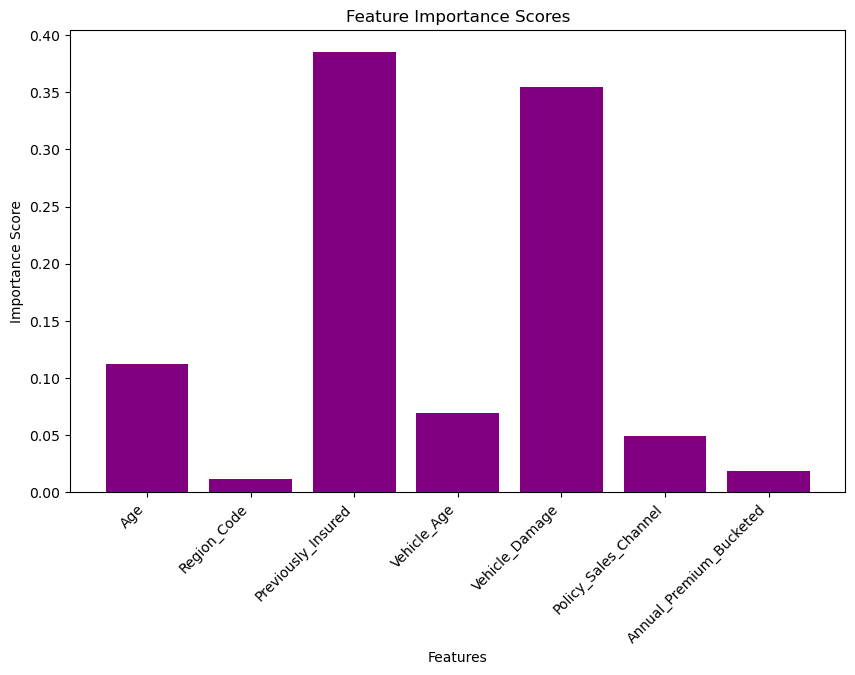

In [99]:

print(X_train.columns.to_list())
print(feature_importances)

feature_names = X_train.columns.to_list()

# Set up the bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(feature_names, feature_importances, color='purple')

# Add labels and title
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance Scores')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Show plot
plt.show()

In [100]:
X_train.columns

Index(['Age', 'Region_Code', 'Previously_Insured', 'Vehicle_Age',
       'Vehicle_Damage', 'Policy_Sales_Channel', 'Annual_Premium_Bucketed'],
      dtype='object')

In [101]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=0.01)

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

print(classification_report(y_test, y_pred))

print(logreg.coef_)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Accuracy: 0.7787898946222578
Precision: 0.7095286653070474
Recall: 0.9452670983712962
              precision    recall  f1-score   support

           0       0.92      0.61      0.73     66037
           1       0.71      0.95      0.81     66249

    accuracy                           0.78    132286
   macro avg       0.81      0.78      0.77    132286
weighted avg       0.81      0.78      0.77    132286

[[-9.33550711e-03 -1.95377725e-03 -4.68672773e+00 -5.34696807e-01
   1.49863626e+00 -4.12208192e-03 -7.79672487e-02]]


In [105]:
logreg.coef_[0]

array([-9.33550711e-03, -1.95377725e-03, -4.68672773e+00, -5.34696807e-01,
        1.49863626e+00, -4.12208192e-03, -7.79672487e-02])

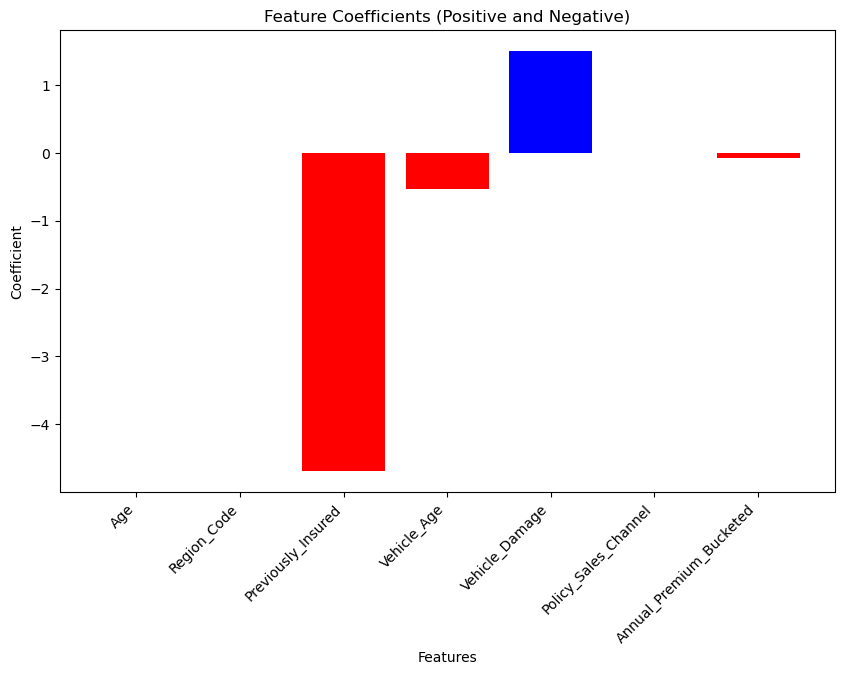

In [106]:
import matplotlib.pyplot as plt

# Given feature names and importance scores
feature_names = X_train.columns.to_list()

# Set up the bar plot
plt.figure(figsize=(10, 6))

# Loop through the coefficients and plot bars with different colors for positive and negative values
for i, coef in enumerate(logreg.coef_[0]):
    if coef >= 0:
        color = 'blue'  # Positive coefficients are colored blue
    else:
        color = 'red'   # Negative coefficients are colored red
    plt.bar(feature_names[i], coef, color=color)

# Add labels and title
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.title('Feature Coefficients (Positive and Negative)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Show plot
plt.show()


In [44]:

feature_names = X_train.columns.to_list()
target_names = X_test.columns.to_list()

print(feature_names,target_names)

['Age', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Policy_Sales_Channel', 'Annual_Premium_Bucketed'] ['Age', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Policy_Sales_Channel', 'Annual_Premium_Bucketed']


Accuracy: 0.8047336830805981
Precision: 0.7493231327156661
Recall: 0.9144147557630227
              precision    recall  f1-score   support

           0       0.89      0.70      0.78     66305
           1       0.75      0.91      0.82     65981

    accuracy                           0.80    132286
   macro avg       0.82      0.81      0.80    132286
weighted avg       0.82      0.80      0.80    132286



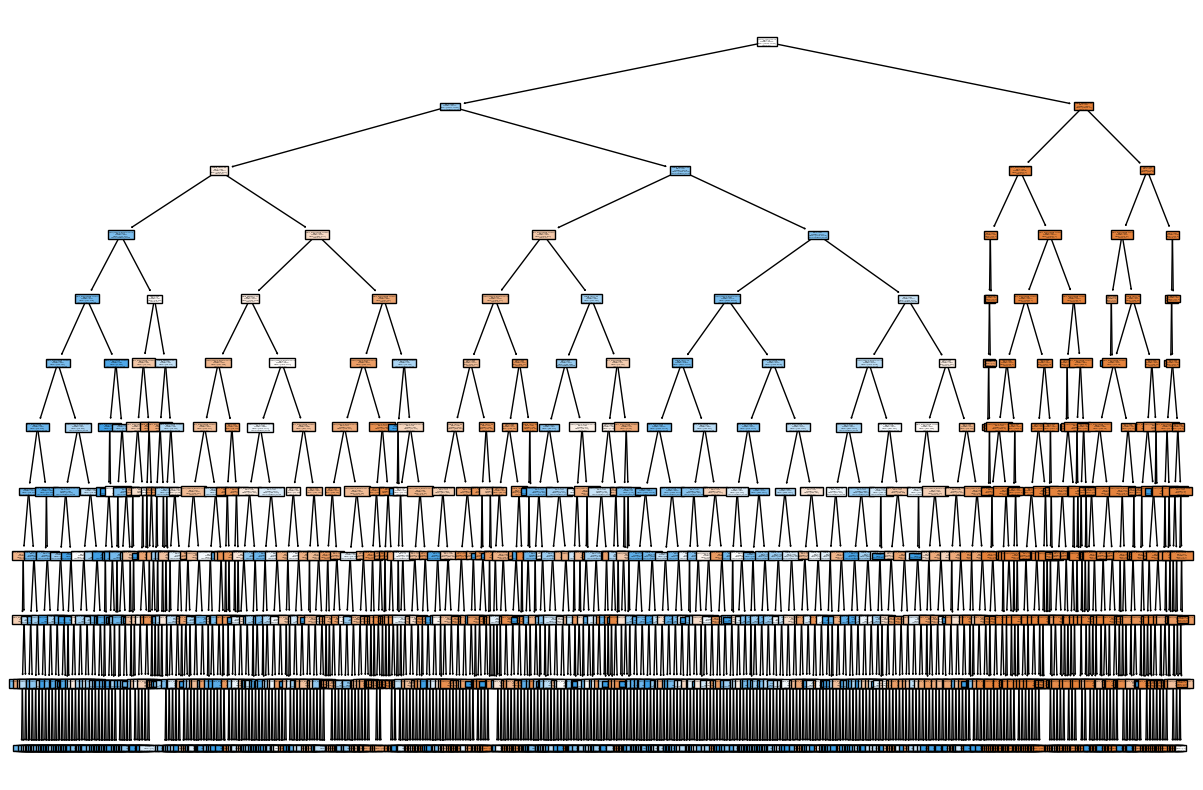

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
clf = DecisionTreeClassifier(max_depth=11)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

print(classification_report(y_test, y_pred))

feature_names = X_train.columns.to_list()
class_names = X_test.columns.to_list()

plt.figure(figsize=(15, 10))
plot_tree(clf, feature_names=feature_names, class_names=class_names, filled=True)
plt.show()

In [104]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

print(classification_report(y_test, y_pred))

distances, indices = knn.kneighbors(X_test)

# Calculate the average distance for each feature
avg_distances_per_feature = np.mean(distances, axis=0)

# Sort features based on average distance
sorted_features_indices = np.argsort(avg_distances_per_feature)

# Print the most influential features
print("Most influential features:")
for idx in sorted_features_indices:
    print(f"{feature_names[idx]}: {avg_distances_per_feature[idx]}")

Accuracy: 0.7981570234189559
Precision: 0.7657795698924731
Recall: 0.8599978867605549
              precision    recall  f1-score   support

           0       0.84      0.74      0.78     66037
           1       0.77      0.86      0.81     66249

    accuracy                           0.80    132286
   macro avg       0.80      0.80      0.80    132286
weighted avg       0.80      0.80      0.80    132286

Most influential features:
Age: 0.14434005647005368
Region_Code: 0.23303224454560495
Previously_Insured: 0.29935693718082523
Vehicle_Age: 0.35348886062623025
Vehicle_Damage: 0.3987021520202944


In [51]:
print(indices)

print(avg_distances_per_feature)

[[78577 29109 57493  1250 33249]
 [ 3447  9587  3699  2555  2793]
 [ 8891 20853 12726   202  2608]
 ...
 [ 1625 13710  2816  9158  4535]
 [ 1713 19504  1478  9569 12334]
 [ 4290  4592  8351  3138  2381]]
[0.02821652 0.04783956 0.06404328 0.07760068 0.08968697]


Accuracy: 0.825529534493446
Precision: 0.8343185879068911
Recall: 0.8253994843727115
              precision    recall  f1-score   support

           0       0.89      0.74      0.81     66037
           1       0.78      0.91      0.84     66249

    accuracy                           0.83    132286
   macro avg       0.83      0.83      0.82    132286
weighted avg       0.83      0.83      0.82    132286



No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


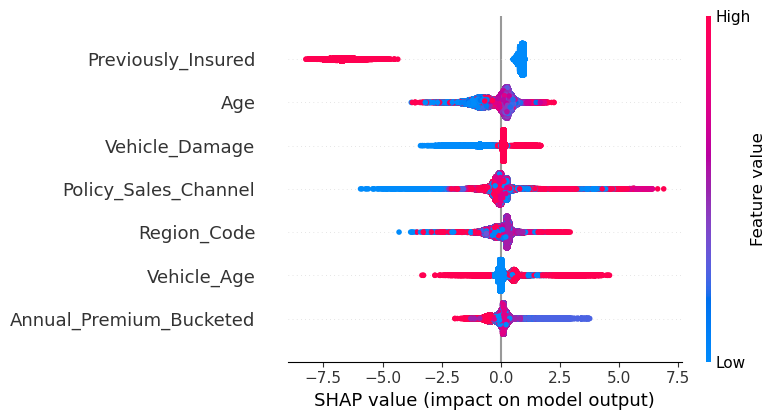

In [120]:
import xgboost as xgb

params = {'learning_rate': 0.5, 'n_estimators': 150}
 
# Train XGBoost model with specified parameters
model = xgb.XGBClassifier(**params)
model.fit(X_train, y_train)
 
# Create SHAP explainer
explainer = shap.Explainer(model)
shap_values = explainer(X_test)
 
y_pred = model.predict(X_test)

# Metrics evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')  # Change average as per your requirement
recall = recall_score(y_test, y_pred, average='macro')  # Change average as per your requirement

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

print(classification_report(y_test, y_pred))

# Visualize SHAP values (e.g., summary plot)
shap.summary_plot(shap_values, X_test)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


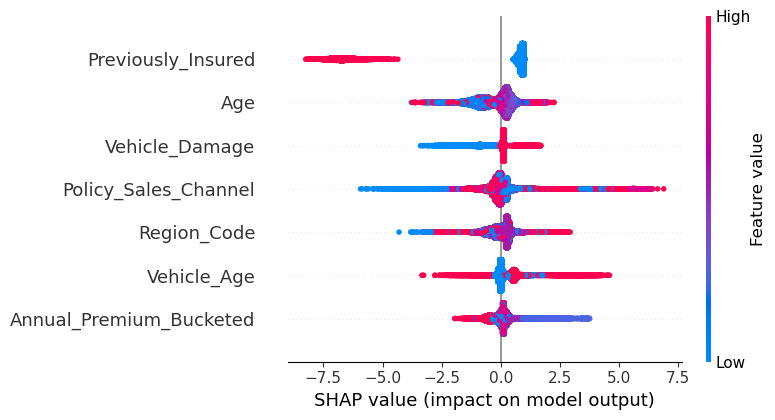

In [123]:
shap.summary_plot(shap_values, X_test)

In [ ]:
import xgboost as xgb
import shap

# Create DMatrix for train and test data
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set parameters for XGBoost model
params = {
    "learning_rate": 0.5,
    "max_depth": 3,
    "objective": "multi:softmax",  # Multiclass classification
    "num_class": len(set(y_train)),  # Number of classes
    "eval_metric": "merror",  # Evaluation metric: Multiclass classification error rate
    "seed": 42
}

# Number of boosting rounds
num_rounds = 100

# Train XGBoost model
xgb_model = xgb.train(params, dtrain, num_rounds)

# Predictions on test data
y_pred = xgb_model.predict(dtest)

# Metrics evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')  # Change average as per your requirement
recall = recall_score(y_test, y_pred, average='macro')  # Change average as per your requirement

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

print(classification_report(y_test, y_pred))




In [115]:
xgb_model.predict(dtest)


array([1., 0., 1., ..., 1., 1., 1.], dtype=float32)

.values =
array([[[-0.17107734,  0.1710773 ],
        [-0.41731805,  0.41731802],
        [-0.43696186,  0.43696186],
        ...,
        [-0.05507125,  0.05507127],
        [-0.07113545,  0.07113543],
        [-0.14404325,  0.14404322]],

       [[ 0.389392  , -0.389392  ],
        [-0.2056778 ,  0.20567782],
        [-0.38672018,  0.3867202 ],
        ...,
        [-0.06117958,  0.0611796 ],
        [-0.01798226,  0.01798225],
        [ 0.23385873, -0.23385873]],

       [[-0.3340993 ,  0.33409917],
        [-0.03596457,  0.03596461],
        [-0.437201  ,  0.43720105],
        ...,
        [-0.0594675 ,  0.05946751],
        [ 0.0795338 , -0.0795338 ],
        [ 0.04033327, -0.04033326]],

       ...,

       [[ 0.24212234, -0.24212229],
        [-0.11667496,  0.116675  ],
        [-0.42772248,  0.42772248],
        ...,
        [-0.05824962,  0.05824963],
        [ 0.30285144, -0.30285147],
        [ 0.10327117, -0.10327115]],

       [[-0.0961395 ,  0.09613951],
        [-0.18698

TypeError: only integer scalar arrays can be converted to a scalar index

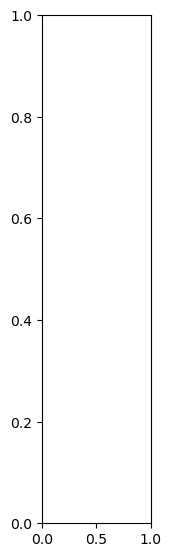

In [119]:
explainer = shap.Explainer(xgb_model)
shap_values = explainer(X_test)

print(shap_values)

shap.summary_plot(shap_values, X_test)